In [1]:
%matplotlib inline

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Change the input file names here!
input_filename = "./input/pre-proc/100true100false.txt"
data = np.loadtxt(input_filename, dtype=float, delimiter=",")

In [3]:
df_labels = 'CenterPixel', \
    'xyImgSliceMean','xyFFTSliceMean','xyCntOverThres', \
    'xzImgSliceMean','xzFFTSliceMean','xzCntOverThres', \
    'yzImgSliceMean','yzFFTSliceMean','yzCntOverThres', \
    'label'
    
df = pd.DataFrame(data, columns=df_labels)

In [4]:
df.head()

,CenterPixel,xyImgSliceMean,xyFFTSliceMean,xyCntOverThres,xzImgSliceMean,xzFFTSliceMean,xzCntOverThres,yzImgSliceMean,yzFFTSliceMean,yzCntOverThres,label
0,135.0,47.388,147.687,47.0,20.347,108.225,6.0,47.796,123.144,39.0,1.0
1,22.0,42.429,144.803,60.0,35.694,108.569,15.0,39.939,118.006,40.0,1.0
2,3.0,40.653,145.021,45.0,48.286,119.094,20.0,42.347,121.545,14.0,1.0
3,72.0,27.735,138.852,44.0,28.980,106.735,13.0,19.061,102.023,8.0,1.0
4,56.0,32.694,145.814,44.0,25.612,127.217,13.0,18.204,115.626,7.0,1.0


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


img-output/feature-comp-CenterPixel.png


NameError: name 'figure' is not defined

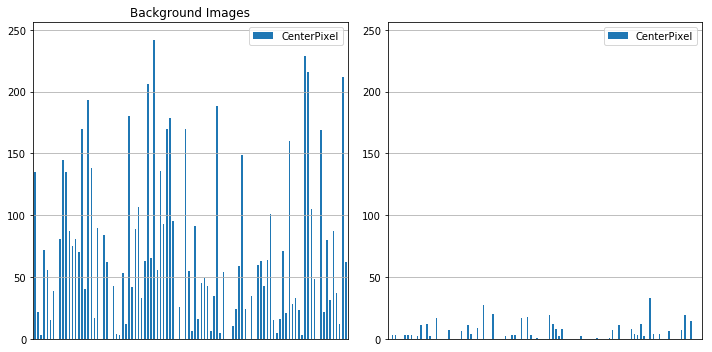

In [6]:
label_list = ['CenterPixel', 'xyImgSliceMean',  'xyFFTSliceMean',  'xyCntOverThres']

for label in label_list:

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    df.loc[df['label'] == 1].plot(kind='bar', y=[label], ax=ax[0])

    df.loc[df['label'] == 0].plot(kind='bar', y=[label], ax=ax[1])
    ax[0].set_title("Foreground Images")
    ax[0].set_xticks([])
    ax[0].set_ylim([0,256])
    ax[0].grid()

    
    ax[0].set_title("Background Images")
    ax[1].set_xticks([])
    ax[1].set_ylim([0,256])
    ax[1].grid()
    
    #fig.suptitle('Main title')
    
    save_fig = True
    fig_format = 'png'
    fig_dpi =300

    plt.tight_layout()
    fig_name = 'img-output/feature-comp-{}.{}'.format(label,fig_format)
    print(fig_name)
    if(save_fig): 
        figure.savefig(fig_name, bbox_inches='tight', format=fig_format, dpi=fig_dpi)
        plt.close(figure)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


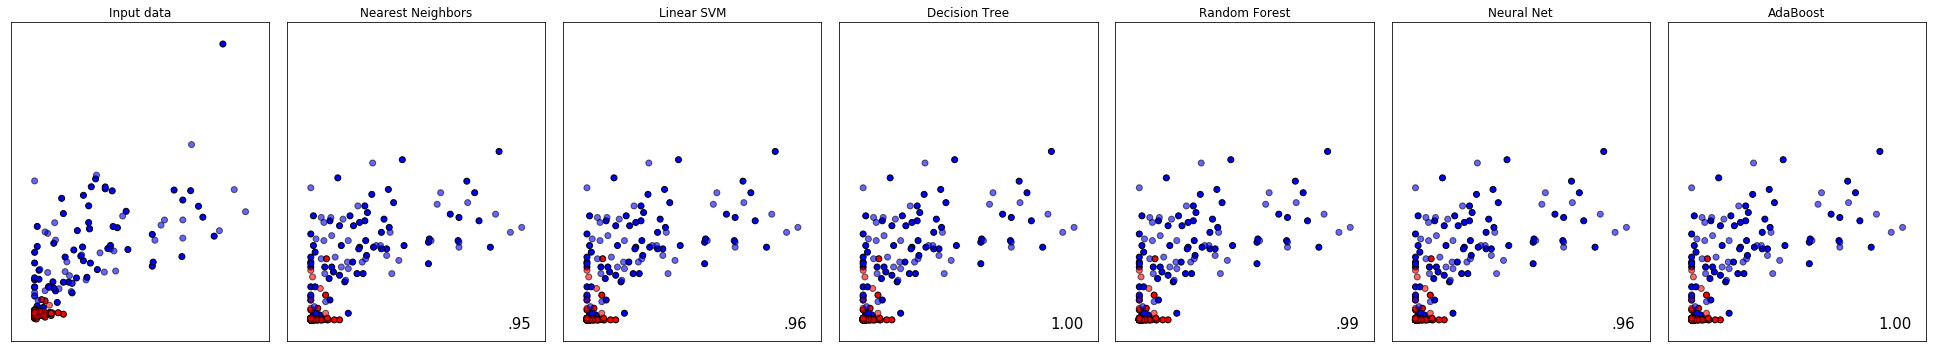

img-output/classification-on-balanced.png


In [7]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

# Change here to look at other classifiers
names = ["Nearest Neighbors", 
         "Linear SVM", 
         #"RBF SVM", 
         #"Gaussian Process",
         "Decision Tree",
         "Random Forest", 
         "Neural Net",
         "AdaBoost"
         #"Naive Bayes", 
         #"QDA"
        ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis()
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0)]

figure = plt.figure(figsize=(27, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X = data[:,:-1]
    y = data[:,-1]
    
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if (False):
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 3], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 3], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

save_fig = True
fig_format = 'png'
fig_dpi =300

plt.tight_layout()
fig_name = 'img-output/classification-on-balanced.{}'.format(fig_format)
print(fig_name)
if(save_fig): 
    figure.savefig(fig_name, bbox_inches='tight', format=fig_format, dpi=fig_dpi)
    plt.close(figure)

In [ ]:
len(xx)